## Processamento dos dados do Ondometro Optico - LabOceano

In [28]:
import pandas as pd
from matplotlib import pyplot as plt
from glob import glob
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

In [21]:
paths = np.sort(glob('../out/' + 'T100_57*'))
paths

array(['../out/T100_570000.csv', '../out/T100_570001.csv',
       '../out/T100_570002.csv', '../out/T100_570003.csv'], dtype='<U22')

T100_570000.csv - Mean: 0.098 m ; STD: 0.024 ; MSE: 0.001 ; R2: -0.004


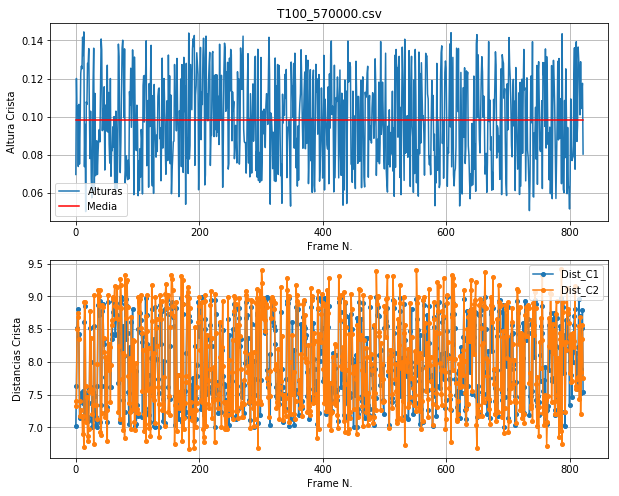

T100_570001.csv - Mean: 0.108 m ; STD: 0.025 ; MSE: 0.001 ; R2: -0.116


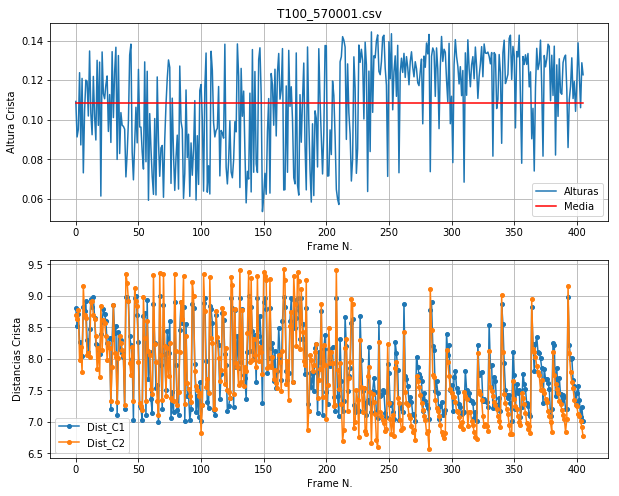

T100_570002.csv - Mean: 0.092 m ; STD: 0.019 ; MSE: 0.000 ; R2: -0.167


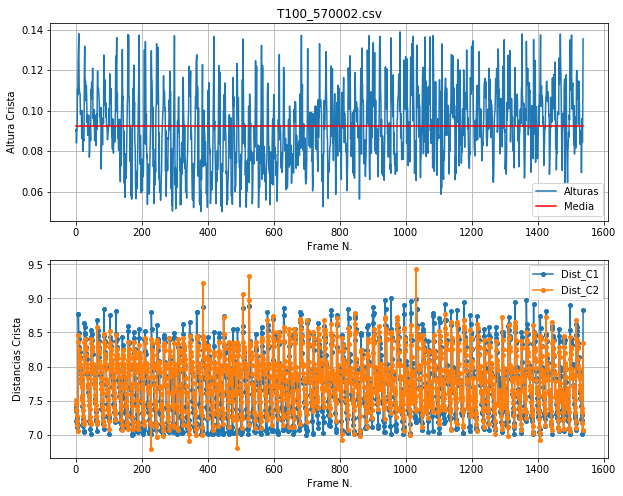

T100_570003.csv - Mean: 0.107 m ; STD: 0.015 ; MSE: 0.000 ; R2: -0.235


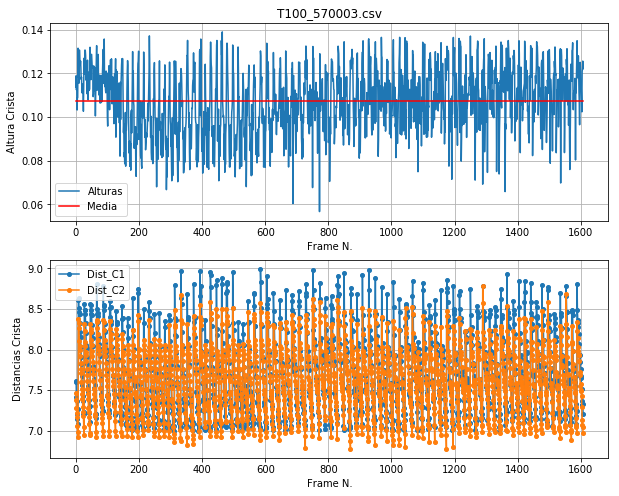

In [30]:
for path in paths:
    
    filename = path.split('/')[-1]
    
    # read data
    out = pd.read_csv(path, header=0, index_col=0)
    out.index.name = 'frame'

    # calculate mean
    altm = out.alt.mean()

    # calculate standard deviation
    std = np.std(out.alt)
    
    # calculate errors
    y_pred = np.ones(len(out)) * 0.10
    y_true = np.array(out.alt)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print ('{} - Mean: {:.3f} m ; STD: {:.3f} ; MSE: {:.3f} ; R2: {:.3f}'.format(filename, altm, std, mse, r2))
    
    # plot figure
    plt.figure(figsize=(10,8))
    plt.subplot(211)
    plt.title(filename)
    plt.plot(out.index, out.alt)
    plt.plot([out.index[0], out.index[-1]], [altm, altm], '-r')
    plt.legend(['Alturas','Media'])
    plt.xlabel('Frame N.')
    plt.ylabel('Altura Crista')
    plt.grid()
    plt.subplot(212)
    plt.plot(out.dcr1, '-o', markersize=4)
    plt.plot(out.dcr2, '-o', markersize=4)
    plt.legend(['Dist_C1','Dist_C2'])
    plt.xlabel('Frame N.')
    plt.ylabel('Distancias Crista')
    plt.grid()


    plt.show()


In [26]:
y_pred

array([0.1, 0.1, 0.1, ..., 0.1, 0.1, 0.1])

In [27]:
y_true

array([0.11370081, 0.1188522 , 0.1124106 , ..., 0.12198228, 0.12557429,
       0.12206524])